In [2]:
import pandas as pd
import numpy as np

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('911.csv')

In [6]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627057 entries, 0 to 627056
Data columns (total 9 columns):
lat          627057 non-null float64
lng          627057 non-null float64
desc         627057 non-null object
zip          550638 non-null float64
title        627057 non-null object
timeStamp    627057 non-null object
twp          626788 non-null object
addr         627057 non-null object
e            627057 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 43.1+ MB


In [10]:
df['zip'].value_counts().head(5)

19401.0    42731
19464.0    41266
19403.0    32831
19446.0    30429
19406.0    21301
Name: zip, dtype: int64

In [11]:
df['twp'].value_counts().head(5)

LOWER MERION    52791
ABINGTON        37783
NORRISTOWN      35184
UPPER MERION    34307
CHELTENHAM      28916
Name: twp, dtype: int64

In [12]:
df['title'].nunique()

147

In [13]:
x = df['title'].iloc[0]

In [14]:
x

'EMS: BACK PAINS/INJURY'

In [15]:
x.split(':')[0]

'EMS'

In [17]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [18]:
df['Reason'].value_counts()

EMS        312615
Traffic    220573
Fire        93869
Name: Reason, dtype: int64

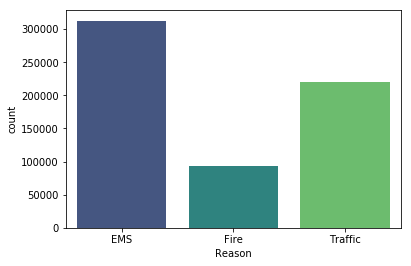

In [20]:
sns.countplot(x='Reason',data = df,palette = 'viridis')

In [21]:
df['timeStamp'].iloc[0]

'2015-12-10 17:10:52'

In [22]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [24]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslib.Timestamp

In [25]:
time = df['timeStamp'].iloc[0]
time.hour

17

In [27]:
time.year

2015

In [28]:
time.hour

17

In [29]:
df['Hour'] = df['timeStamp'].apply(lambda time:time.hour)

In [31]:
df['Month'] = df['timeStamp'].apply(lambda time:time.month)
df['Dayofweek'] = df['timeStamp'].apply(lambda time:time.dayofweek)

In [32]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Reason,Hour,Month,Dayofweek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,Fire,14,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,EMS,16,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,EMS,16,12,3


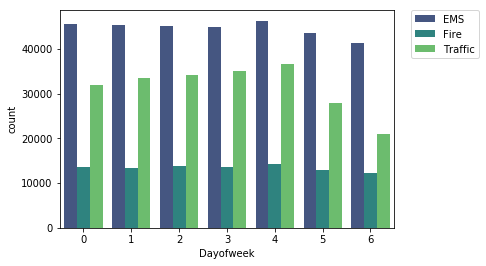

In [36]:
sns.countplot(x='Dayofweek',data=df,hue='Reason',palette='viridis')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0)

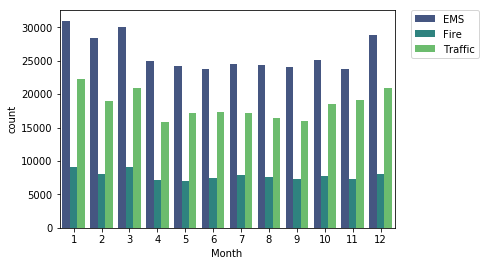

In [38]:
sns.countplot(x='Month',data=df,hue='Reason',palette='viridis')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0)

In [39]:
byMonth = df.groupby('Month').count()

In [40]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Reason,Hour,Dayofweek
Month,,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027,60027
4,48050,48050,48050,42233,48050,48050,48036,48050,48050,48050,48050,48050,48050
5,48467,48467,48467,42257,48467,48467,48443,48467,48467,48467,48467,48467,48467


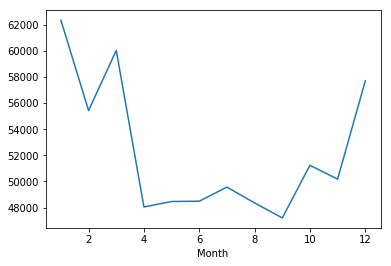

In [41]:
byMonth['lat'].plot()

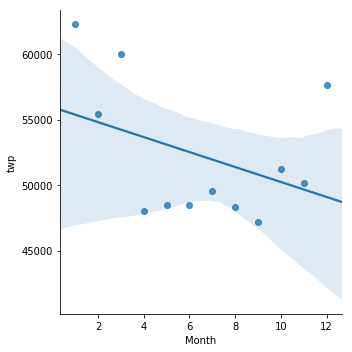

In [43]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())